In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# telechargement des données et repartition

In [ ]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


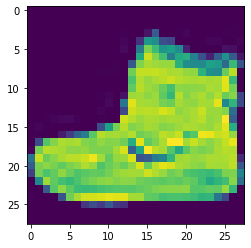

In [ ]:
plt.imshow(x_train[0])

# Normalisation des données

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

In [ ]:
x_train[0].max()

1.0

# reshape des données 

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

# Conversion en one hot encoding

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,num_classes=10,dtype='int32')

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10, dtype='int32')

In [ ]:
y_cat_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

# Construction du modele

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# creationn callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

# Entrainnement du modele

In [ ]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3229 - accuracy: 0.8832 - val_loss: 0.3078 - val_accuracy: 0.8886
Epoch 2/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2551 - accuracy: 0.9064 - val_loss: 0.2749 - val_accuracy: 0.9008
Epoch 3/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2152 - accuracy: 0.9195 - val_loss: 0.2641 - val_accuracy: 0.9050
Epoch 4/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1850 - accuracy: 0.9317 - val_loss: 0.2514 - val_accuracy: 0.9126
Epoch 5/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1597 - accuracy: 0.9402 - val_loss: 0.2776 - val_accuracy: 0.9036
Epoch 6/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1354 - accuracy: 0.9500 - val_loss: 0.2877 - val_accuracy: 0.9041
Epoch 7/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1150 - accuracy: 0.9578 - val_loss: 0.2975 -

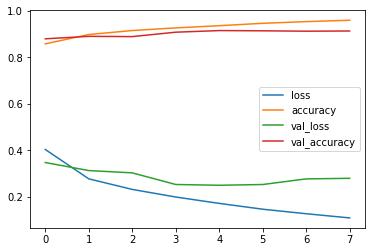

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [33]:
descriptions = ['t-shirt', 'trouser', 'pullover', 'dress',
                'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [48]:

def predict_in_test(id):
  plt.imshow(x_test[id].reshape(28,28))
  pic_to_pred = x_test[id].reshape(1,28,28,1)
  prediction = np.argmax(model.predict(pic_to_pred))
  label = descriptions[prediction]
  print(label)

t-shirt


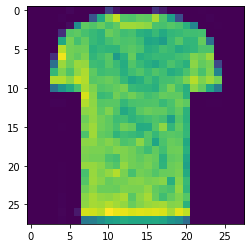

In [56]:
predict_in_test(125)